# Research 

## Visualization
- https://inventwithpython.com/bigbookpython/project21.html
- https://dev.to/ihtesham_haider/python-project-dna-visualization-with-tutorial-28pg

In [2]:
import random
import sys
import time

In [3]:
import time 
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print(f"{method.__name__} {(te - ts) * 1000}  ms")
        return result
    return timed

In [4]:
m = [123 , 45, 56 , 67, 78, 50, 23, 56, 90, 67, 90, 65]
size=8 

@timeit
def get_helix_range(data, block_size) : 
    k = dict()
    helix_number = 0 

    while len(data) > 0 : 

        for i in range(0, block_size): 

            try : 
                fist_elem = data[0]
                del data[0]
                
            except IndexError as e : 
                fist_elem = None

            if helix_number in k :
                k[helix_number].append(fist_elem) 
            else : 
                k[helix_number] = []
                k[helix_number].append(fist_elem) 
                
        helix_number +=1

    return k

get_helix_range(m,size)

get_helix_range 0.02193450927734375  ms


{0: [123, 45, 56, 67, 78, 50, 23, 56],
 1: [90, 67, 90, 65, None, None, None, None]}

In [5]:
list1 =[]
@timeit
def test(nucleotides):
    result_div = len(nucleotides)//8 
    for i in range(0, result_div):
       list1.append(nucleotides[0:8])
       del nucleotides[0:8]
    list1.append(nucleotides)
    return list1

list1 = test(['1', '1', '3', '0', '2', '2', '1', '1', '0', '0', '3', '0', '2', '2', '2', '1', '3', '2', '0', '1', '2', '3', '2', '2', '3', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'])


test 0.0050067901611328125  ms


## Goal : 
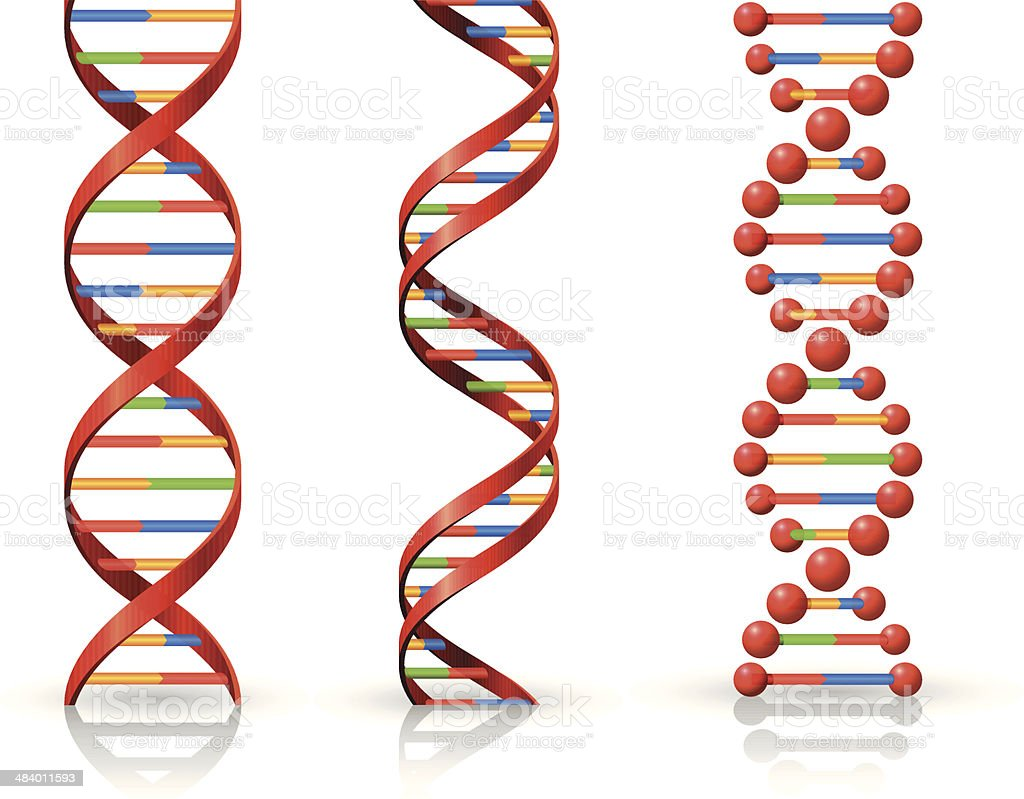

In [6]:
from ipycanvas import Canvas
import math 
import matplotlib.pyplot as plt
import numpy as np 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


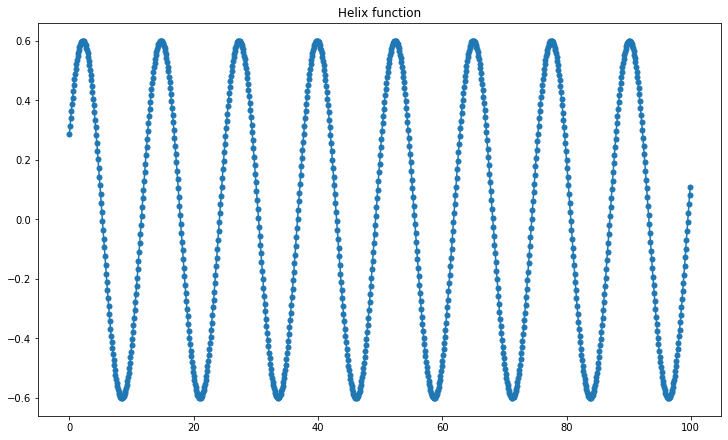

In [7]:
def compute_x(x, a, h ,b ,k) : 
    return a * np.sin((x - h) / b) + k 
    

size = 100
x = np.arange(start=0, stop=size, step=0.1)
left_y = []
right_y = []

for point in x : 
    left_y.append(compute_x(x=point, a=0.6, h=-1.0 ,b=2,k= 0))
    right_y.append(compute_x(x=point,  a=0.6, h=5 , b=2, k=0 ))

fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
ax.set_title("Helix function")

plt.plot(x, left_y,'o',ls='-', ms=5, markevery=1)

 

In [8]:
data_horizotal_left = np.array(list(zip(x,left_y)))
data_horizotal_right = np.array(list(zip(x,right_y)))


In [9]:
theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
print(R) 

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


In [10]:
left_helix = R.dot(data_horizotal_left.transpose())
right_helix = R.dot(data_horizotal_right.transpose())

/var/folders/r7/bt288pwn5y5f3wkcj04c70km0000gn/T/ipykernel_72649/1580143539.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([pt1x,middlex], [pt1y,middley], 'bo', linestyle="--",color="blue")
/var/folders/r7/bt288pwn5y5f3wkcj04c70km0000gn/T/ipykernel_72649/1580143539.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([middlex,pt2x], [middley,pt2y], 'bo', linestyle="--" , color="red")


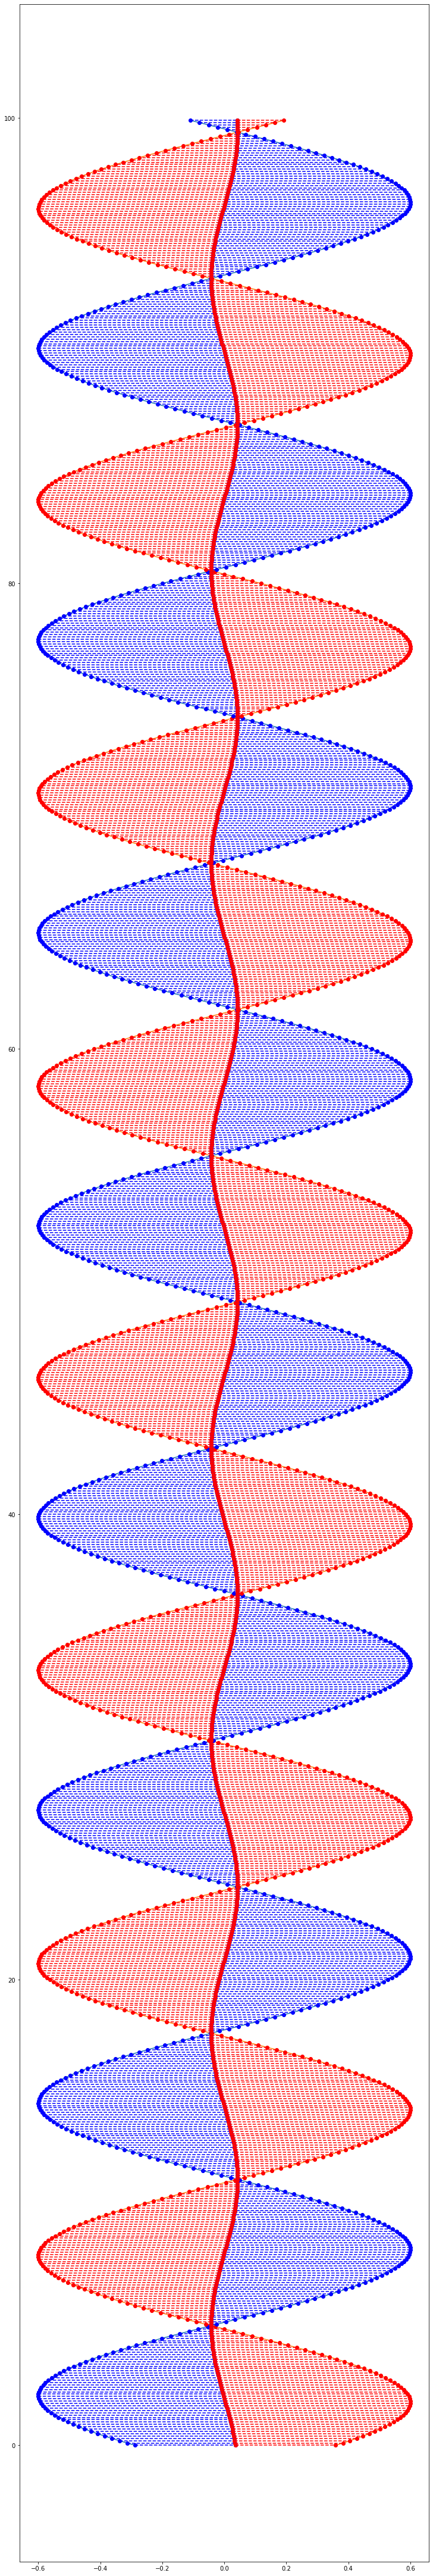

In [11]:

fig, ax = plt.subplots(1, 1, figsize=(10, 60), constrained_layout=True)

plt.plot(left_helix[0], left_helix[1],'o',ls='-', ms=5, markevery=1)
plt.plot(right_helix[0], right_helix[1],'o',ls='-', ms=5, markevery=1)


for y in range(len(left_helix[0])): 
    
    # full distance 
    pt1x = left_helix[0][y]
    pt1y = left_helix[1][y]

    pt2x = right_helix[0][y]
    pt2y = right_helix[1][y]
    
    # compute mid distance 
    
    middlex = (pt1x + pt2x) / 2 
    middley = (pt1y + pt2y) / 2 
    
    # pt1 => middle point 

    plt.plot([pt1x,middlex], [pt1y,middley], 'bo', linestyle="--",color="blue")
    
    #  middle point => pt2 

    plt.plot([middlex,pt2x], [middley,pt2y], 'bo', linestyle="--" , color="red")

plt.show()


In [12]:

from ipycanvas import Canvas, hold_canvas
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact
import math 

MARGIN=60

def drawDna(): 
    canvas = Canvas(width=500, height=900)
    
    for y in range(1, len(left_helix[0]), 8): 

        # full distance 
        
        pt1x = left_helix[0][y] * 200 + 200
        pt1y = left_helix[1][y] * MARGIN

        pt2x = right_helix[0][y] * 200 + 200
        pt2y = right_helix[1][y] * MARGIN


        # compute mid distance 

        canvas.line_width = 2

        middlex = (pt1x + pt2x) / 2 
        middley = (pt1y + pt2y) / 2 

        # pt1 => middle point 

        canvas.stroke_style = 'blue'
        canvas.stroke_line(pt1x, pt1y, middlex, middley)

        #  middle point => pt2 
        canvas.stroke_style = 'red'
        canvas.stroke_line(middlex,middley, pt2x,pt2y)
        
        canvas.stroke_style = 'black'
        canvas.fill_circle(pt1x, pt1y, 6)
        canvas.fill_circle(pt2x, pt2y, 6)
        
        canvas.stroke_style = 'yellow'
        canvas.stroke_line(middlex - 10 , middley + 10, middlex - 10, middley + 10)
        
        
    return canvas

drawDna()

Canvas(height=900, width=500)